In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')

In [ ]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


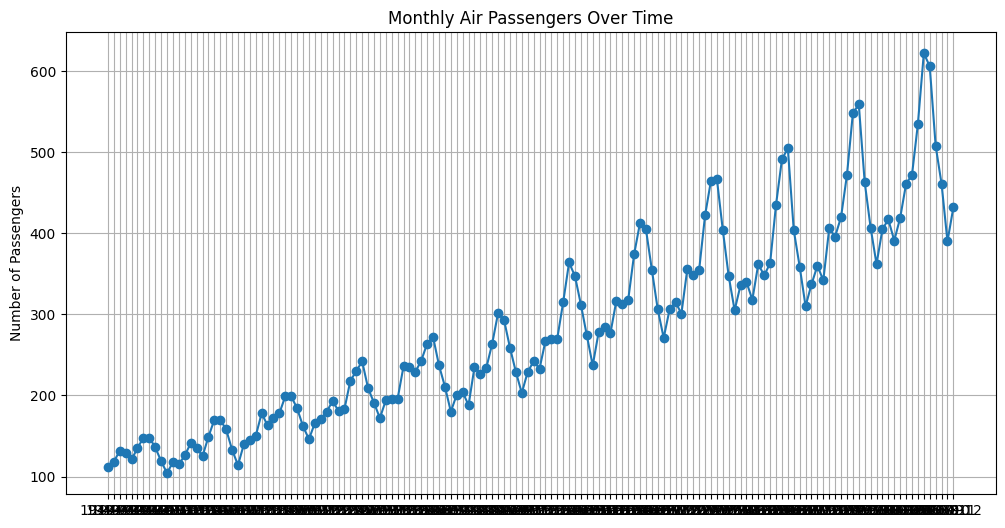

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Month'], data['Passengers'], marker='o')
plt.title('Monthly Air Passengers Over Time')

plt.ylabel('Number of Passengers')

plt.grid(True)
plt.show()

In [ ]:
data['Month'] = pd.to_datetime(data['Month'])

data.set_index('Month', inplace=True)

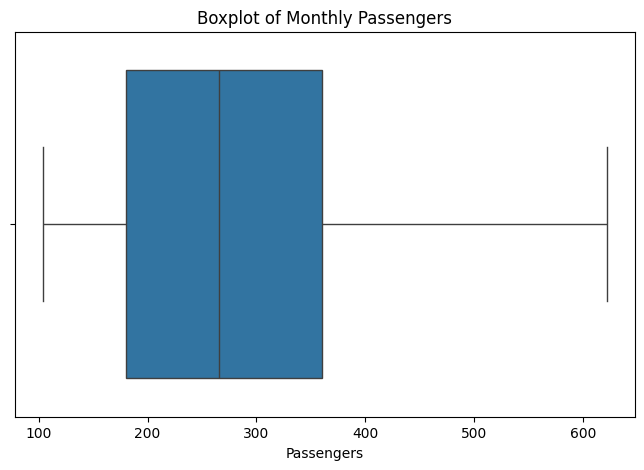

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Passengers'])
plt.title('Boxplot of Monthly Passengers')
plt.show()

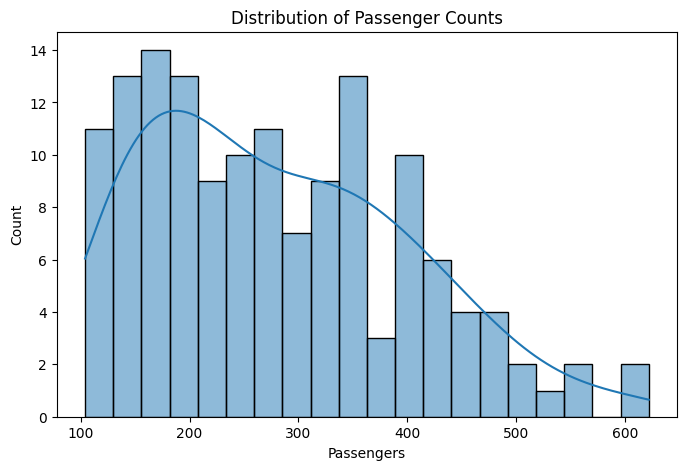

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Passengers'], bins=20, kde=True)
plt.title('Distribution of Passenger Counts')
plt.xlabel('Passengers')
plt.show()


In [ ]:
passenger_data = data['Passengers'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(passenger_data)


In [ ]:
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
time_step = 10
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
train_size = int(len(X) * 0.67)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0714 - val_loss: 0.1573
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0150 - val_loss: 0.0275
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0128 - val_loss: 0.0277
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0086 - val_loss: 0.0472
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0079 - val_loss: 0.0505
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0069 - val_loss: 0.0351
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0061 - val_loss: 0.0258
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0065 - val_loss: 0.0271
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0077 - val_loss: 0.0294
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0066 - val_loss: 0.0267
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0061 - val_loss: 0.0258
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0055 - val_loss: 0.0267


In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

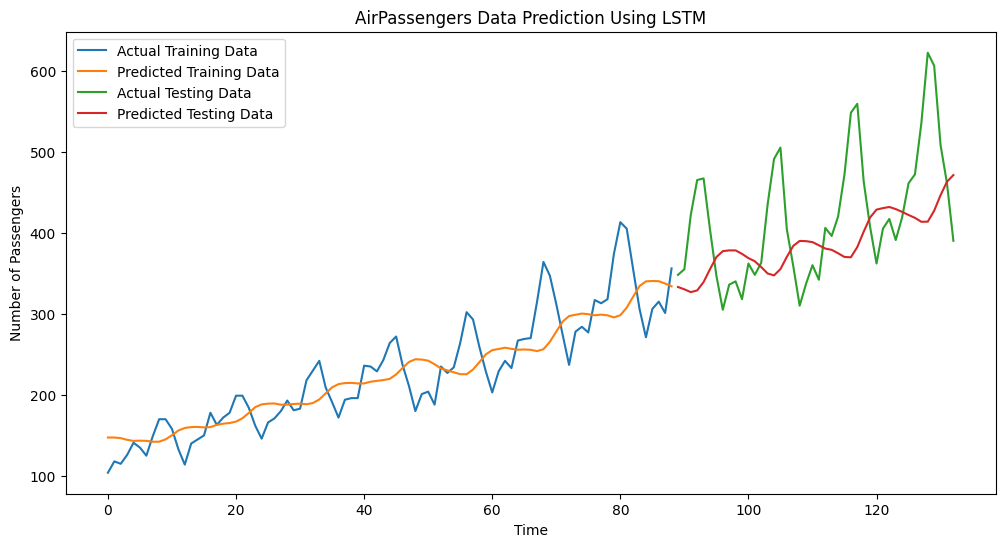

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train_inv)), y_train_inv, label='Actual Training Data')
plt.plot(np.arange(len(train_predict)), train_predict, label='Predicted Training Data')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_inv, label='Actual Testing Data')
plt.plot(np.arange(len(train_predict), len(train_predict) + len(test_predict)), test_predict, label='Predicted Testing Data')
plt.title('AirPassengers Data Prediction Using LSTM')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [ ]:
train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')


Training RMSE: 37.409035304082536
Testing RMSE: 84.69029365693358


In [ ]:
time_step = 20
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
from keras.layers import LSTM, Dense, Dropout, Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(time_step, 1)))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5)


In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - loss: 0.0443 - val_loss: 0.0378 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0106 - val_loss: 0.0252 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0059 - val_loss: 0.0230 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0041 - val_loss: 0.0234 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0063 - val_loss: 0.0215 - learning_rate: 0.0010
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0053 - val_loss: 0.0226 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0048 - val_loss: 0.0212 - learning_rate: 0.0010
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0085 - val_loss: 0.0221 - learning_rate: 0.0010
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0063 - val_loss: 0.0200 - learning_rate: 0.0010
Epoch 10/50
12/12 

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

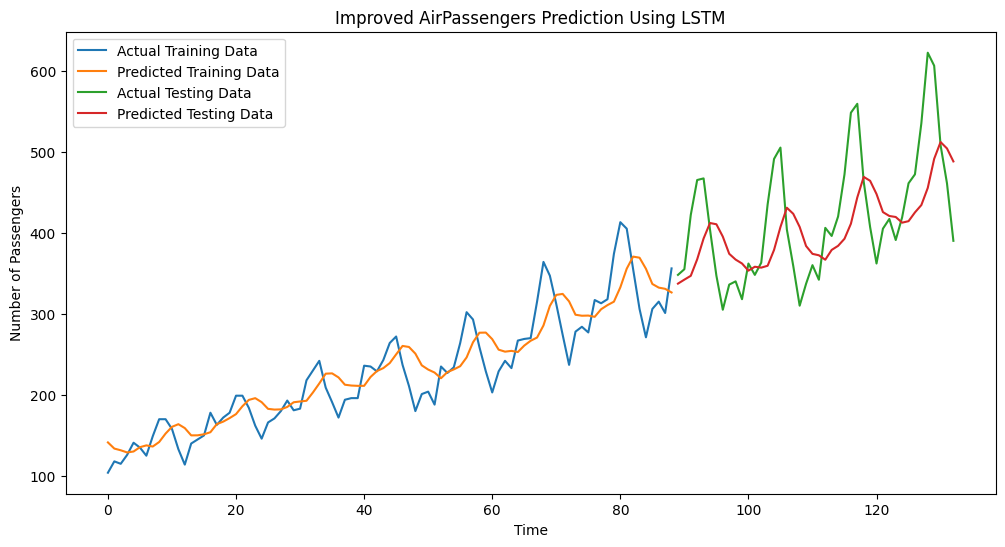

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train_inv)), y_train_inv, label='Actual Training Data')
plt.plot(np.arange(len(train_predict)), train_predict, label='Predicted Training Data')
plt.plot(
    np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)),
    y_test_inv,
    label='Actual Testing Data'
)
plt.plot(
    np.arange(len(train_predict), len(train_predict) + len(test_predict)),
    test_predict,
    label='Predicted Testing Data'
)
plt.title('Improved AirPassengers Prediction Using LSTM')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [ ]:
train_rmse = np.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))

print(f'Improved Training RMSE: {train_rmse}')
print(f'Improved Testing RMSE: {test_rmse}')


Improved Training RMSE: 32.21729553680484
Improved Testing RMSE: 68.01012643549387
